In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
#import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from epi.models import Parameter, Model
from epi.normalizing_flows import NormalizingFlow
from epi.util import pairplot, AugLagHPs
from epi.example_eps import V1_dr_eps, V1_all_dr_eps

neuron_inds = {'E':0, 'P':1, 'S':2, 'V':3}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
inc_val = 0.0
inc_std = 0.25

D = 4
lb = -5.*np.ones((D,))
ub = 5.*np.ones((D,))

dh = Parameter("dh", D, lb=lb, ub=ub)
parameters = [dh]

alphas = ['E', 'P', 'S', 'V']
num_alphas = len(alphas)

black = np.array([0, 0, 0])
blue = '#4769A0'
red = '#AF3A31'
green = '#287C5A'
colors = [black, blue, red, green]

In [26]:
# Define model
alpha = 'V'

name = "V1Circuit_%s" % alpha
dh = Parameter("dh", D, lb=lb, ub=ub)
parameters = [dh]
model = Model(name, parameters)

# Define eps
dr = V1_dr_eps(alpha, inc_val)
model.set_eps(dr)
mu = np.array([inc_val, inc_std**2])

In [31]:
epi_df = model.get_epi_df()
print(epi_df)

     Unnamed: 0  k  iteration         H  converged        R1         R2  \
0             0  0          0  8.680102        NaN  3.155783  65.777120   
1             1  1        250  7.858070        NaN -0.635897   1.846362   
2             2  1        500  7.967384        NaN -0.741688   0.826350   
3             3  1        750  8.159073        NaN -0.705430   1.138684   
4             4  1       1000  8.200163        NaN -0.688096   1.049819   
..          ... ..        ...       ...        ...       ...        ...   
176         176  9      44000  5.667620        NaN -0.043258   0.000202   
177         177  9      44250  5.734635        NaN  0.019894   0.008512   
178         178  9      44500  5.709194        NaN -0.032485   0.001643   
179         179  9      44750  5.661214        NaN -0.008262   0.000484   
180         180  9      45000  5.709696        1.0 -0.008903   0.019020   

                                                  path  \
0    data/epi/V1Circuit_V/54385a77ae9b35d

<AxesSubplot:xlabel='iteration'>

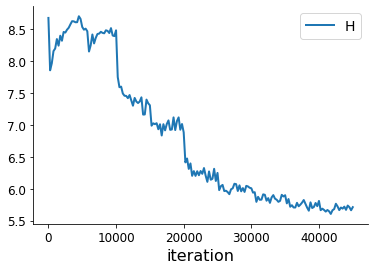

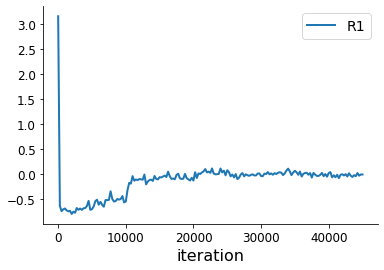

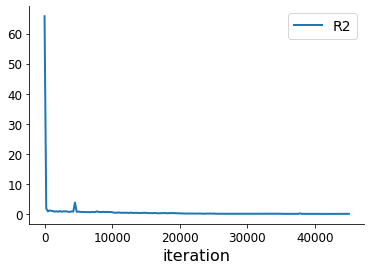

In [30]:
epi_df.plot('iteration', 'H')
epi_df.plot('iteration', 'R1')
epi_df.plot('iteration', 'R2')

In [28]:
# Define inititalization params
init_params = {'mu':np.zeros((model.D,)), 'Sigma':np.eye(model.D)}

# Define arch
nf = NormalizingFlow(
    arch_type='coupling',
    D=model.D,
    num_stages=3,
    num_layers=2,
    num_units=50,
    batch_norm=True,
    post_affine=True,
    bounds=model._get_bounds(),
    random_seed=2,
)

AL_hps = AugLagHPs(N=500, lr=1e-3, c0=1., gamma=0.25, beta=4.)

epi_path, exists = model.get_epi_path(init_params, nf, mu, AL_hps)
print(epi_path, exists)

data/epi/V1Circuit_V/54385a77ae9b35de8ad613696e4e2ad4/D4_C3_L2_U50_bnmom=9.90E-01_PA_rs2/5bdb0b5c6589838cdbb6a35f72b66119/N500_lr1.00E-03_c0=1.00E+00_gamma2.50E-01_beta4.00E+00 True
